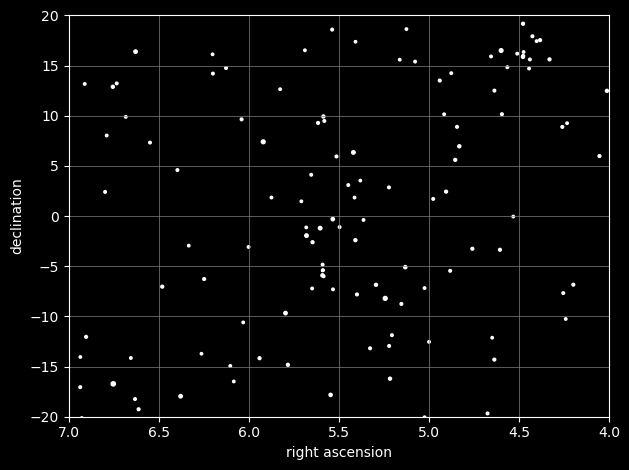

In [1]:
from skyfield.api import Star, load
from skyfield.data import hipparcos
from matplotlib import pyplot as plt
ts = load.timescale()

plt.style.use(['dark_background'])
plt.title=f'Stars in Orion brighter than magnitude 5'
plt.xlabel('right ascension')
plt.ylabel('declination') 
plt.xlim(7.0, 4.0)
plt.ylim(-20, 20)
plt.grid(color = 'gray', linestyle = '-', linewidth = .5)
plt.tight_layout()

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

eph = load('de421.bsp')
earth = eph['earth']

df_visible = df[df['magnitude'] <= 5.0]
bright_stars = Star.from_dataframe(df_visible)

astrometric = earth.at(ts.now()).observe(bright_stars)
ra, dec, distance = astrometric.radec()

plt.scatter(ra.hours, dec.degrees, 8 - df_visible['magnitude'], 'w')